In [1]:
import numpy as np
import pandas as pd

In [2]:
dataset=pd.read_csv("dataset/raw_data1.csv")
print(dataset.dtypes)

dataset.head()

Patient Number                               float64
State Patient Number                          object
Date Announced                                object
Estimated Onset Date                         float64
Age Bracket                                   object
Gender                                        object
Detected City                                 object
Detected District                             object
Detected State                                object
State code                                    object
Current Status                                object
Notes                                         object
Contracted from which Patient (Suspected)     object
Nationality                                   object
Type of transmission                          object
Status Change Date                            object
Source_1                                      object
Source_2                                      object
Source_3                                      

,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Notes,Contracted from which Patient (Suspected),Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases
0,1.0,KL-TS-P1,30/01/2020,NaN,20,F,Thrissur,Thrissur,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
1,2.0,KL-AL-P1,02/02/2020,NaN,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1
2,3.0,KL-KS-P1,03/02/2020,NaN,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,Travelled from Wuhan,NaN,India,Imported,14/02/2020,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1
3,4.0,DL-P1,02/03/2020,NaN,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,...,"Travelled from Austria, Italy",NaN,India,Imported,15/03/2020,https://www.indiatoday.in/india/story/not-a-ja...,https://economictimes.indiatimes.com/news/poli...,NaN,Travel history to Italy and Austria,1
4,5.0,TS-P1,02/03/2020,NaN,24,M,Hyderabad,Hyderabad,Telangana,TG,...,"Travelled from Dubai to Bangalore on 20th Feb,...",NaN,India,Imported,02/03/2020,https://www.deccanherald.com/national/south/qu...,https://www.indiatoday.in/india/story/coronavi...,https://www.thehindu.com/news/national/coronav...,"Travel history to Dubai, Singapore contact",1


In [3]:
dataset.isnull().any()

Patient Number                                True
State Patient Number                          True
Date Announced                               False
Estimated Onset Date                          True
Age Bracket                                   True
Gender                                        True
Detected City                                 True
Detected District                             True
Detected State                                True
State code                                    True
Current Status                               False
Notes                                         True
Contracted from which Patient (Suspected)     True
Nationality                                   True
Type of transmission                          True
Status Change Date                            True
Source_1                                      True
Source_2                                      True
Source_3                                      True
Backup Notes                   

In [4]:
dataset['Patient Number'].fillna(dataset['Patient Number'].median(),inplace = True)
dataset['State Patient Number'].fillna(dataset['State Patient Number'].mode()[0],inplace = True)
#dataset['Estimated Onset Date'].fillna(dataset['Estimated Onset Date'].mode()[0],inplace = True)
dataset['Age Bracket'].fillna(dataset['Age Bracket'].mode()[0],inplace = True)
dataset['Gender'].fillna(dataset['Gender'].mode()[0] ,inplace = True)
dataset['Detected City'].fillna(dataset['Detected City'].mode()[0],inplace = True)
dataset['Detected District'].fillna(dataset['Detected District'].mode()[0],inplace = True)
dataset['Detected State'].fillna(dataset['Detected State'].mode()[0],inplace = True)
dataset['State code'].fillna(dataset['State code'].mode()[0],inplace = True)
dataset['Nationality'].fillna(dataset['Nationality'].mode()[0] ,inplace = True)
dataset['Type of transmission'].fillna(dataset['Type of transmission'].mode()[0] ,inplace = True)
dataset['Status Change Date'].fillna(dataset['Status Change Date'].mode()[0] ,inplace = True)
dataset.drop(['Source_1', 'Source_2', 'Source_3', "Contracted from which Patient (Suspected)", "Estimated Onset Date"], axis=1, inplace=True)
dataset["Age Bracket"].replace({"28-35": "32", "1.5": 2}, inplace=True)
dataset["Age Bracket"] = dataset["Age Bracket"].astype(str).astype(int)
dataset.tail(2)

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Nationality,Type of transmission,Status Change Date,Backup Notes,Num cases
17362,8653.5,AP-P110,19/04/2020,35,M,MCGM,Nagpur,Maharashtra,MH,Hospitalized,Correction for district count,India,Local,19/04/2020,NaN,10
17363,8653.5,AP-P110,19/04/2020,35,M,MCGM,Mumbai,Maharashtra,MH,Hospitalized,Correction for district count,India,Local,19/04/2020,NaN,-10


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

#encoding
dataset["Patient Number"]=le.fit_transform(dataset["Patient Number"])
dataset["State Patient Number"]=le.fit_transform(dataset["State Patient Number"])
#print(len(dataset["State Patient Number"].unique()))
dataset.head()

,Patient Number,State Patient Number,Date Announced,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Nationality,Type of transmission,Status Change Date,Backup Notes,Num cases
0,0,859,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan,1
1,1,818,02/02/2020,35,M,Alappuzha,Alappuzha,Kerala,KL,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan,1
2,2,834,03/02/2020,35,M,Kasaragod,Kasaragod,Kerala,KL,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan,1
3,3,420,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,DL,Recovered,"Travelled from Austria, Italy",India,Imported,15/03/2020,Travel history to Italy and Austria,1
4,4,2374,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",India,Imported,02/03/2020,"Travel history to Dubai, Singapore contact",1


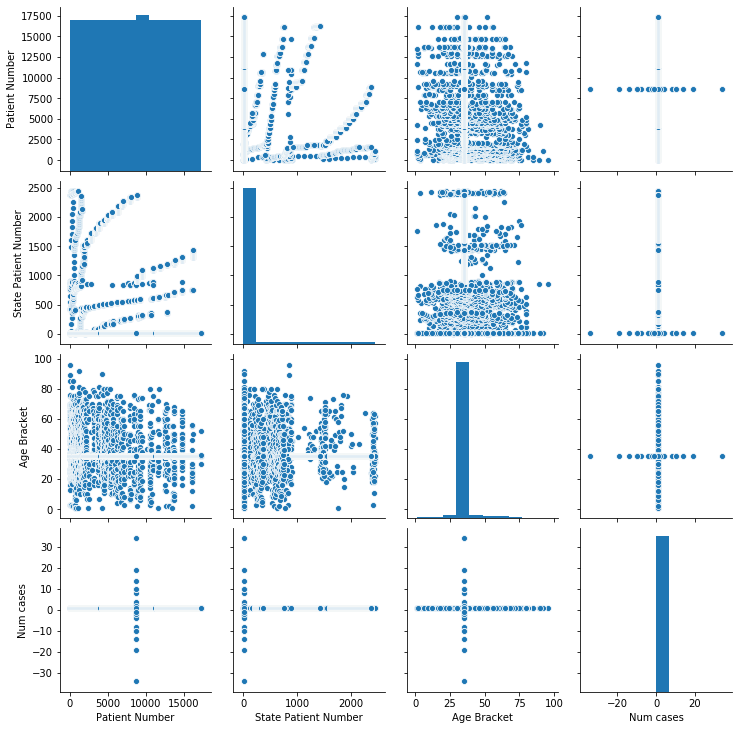

In [15]:
import seaborn as sns
sns.pairplot(dataset)

In [6]:
from cn.protect import Protect
from cn.protect.privacy import KAnonymity
from cn.protect.hierarchy import DataHierarchy, OrderHierarchy, IntervalHierarchy
from cn.protect.quality import Loss
from sklearn.linear_model import LogisticRegression, SGDClassifier

In [7]:
#print(len(dataset["Patient Number"].unique()))
prot=Protect(dataset, KAnonymity(17300))
prot.quality_model=Loss()
prot.suppression=.1

In [8]:
for col in dataset:
    if col not in ("Patient Number", "State Patient Number", "Detected District"):
        prot.itypes[col]='insensitive'
    
prot.itypes["Patient Number"]='identifying'
prot.itypes["State Patient Number"]='quasi'
prot.itypes["Detected District"]='quasi'
prot.itypes["Age Bracket"]='insensitive'
prot.itypes

Patient Number          IDENTIFYING
State Patient Number          QUASI
Date Announced          INSENSITIVE
Age Bracket             INSENSITIVE
Gender                  INSENSITIVE
Detected City           INSENSITIVE
Detected District             QUASI
Detected State          INSENSITIVE
State code              INSENSITIVE
Current Status          INSENSITIVE
Notes                   INSENSITIVE
Nationality             INSENSITIVE
Type of transmission    INSENSITIVE
Status Change Date      INSENSITIVE
Backup Notes            INSENSITIVE
Num cases               INSENSITIVE
dtype: object

In [9]:
prot.stats

Series([], dtype: float64)

In [10]:
priv = prot.protect()
priv=priv.rename(columns={"Age Bracket":"age"})

In [11]:
bins = [0,18, 30, 40, 50, 60, 70, 120]
labels = ['0-17','18-29', '30-39', '40-49', '50-59', '60-69', '70+']
priv['Age'] = pd.cut(priv.age, bins, labels = labels,include_lowest = True)

In [13]:
priv

,Patient Number,State Patient Number,Date Announced,age,Gender,Detected City,Detected District,Detected State,State code,Current Status,Notes,Nationality,Type of transmission,Status Change Date,Backup Notes,Num cases
0,*,*,30/01/2020,18-29,F,Thrissur,*,Kerala,KL,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan,1
1,*,*,02/02/2020,30-39,M,Alappuzha,*,Kerala,KL,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan,1
2,*,*,03/02/2020,30-39,M,Kasaragod,*,Kerala,KL,Recovered,Travelled from Wuhan,India,Imported,14/02/2020,Student from Wuhan,1
3,*,*,02/03/2020,40-49,M,East Delhi (Mayur Vihar),*,Delhi,DL,Recovered,"Travelled from Austria, Italy",India,Imported,15/03/2020,Travel history to Italy and Austria,1
4,*,*,02/03/2020,18-29,M,Hyderabad,*,Telangana,TG,Recovered,"Travelled from Dubai to Bangalore on 20th Feb,...",India,Imported,02/03/2020,"Travel history to Dubai, Singapore contact",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17359,*,*,16/04/2020,30-39,M,MCGM,*,Maharashtra,MH,Hospitalized,Correction for district count,India,Local,19/04/2020,NaN,-2
17360,*,*,18/04/2020,30-39,M,MCGM,*,Maharashtra,MH,Hospitalized,Correction for district count,India,Local,19/04/2020,NaN,1
17361,*,*,18/04/2020,30-39,M,MCGM,*,Maharashtra,MH,Hospitalized,Correction for district count,India,Local,19/04/2020,NaN,-1
17362,*,*,19/04/2020,30-39,M,MCGM,*,Maharashtra,MH,Hospitalized,Correction for district count,India,Local,19/04/2020,NaN,10


In [14]:
dataset.to_csv('Privacy_Protected_rawdata1.csv',index=False)